# <h3 align="center">__Module 1 Activity__</h3>
# <h3 align="center">__Assigned at the start of Module 1__</h3>
# <h3 align="center">__Due at the end of Module 1__</h3><br>

# Weekly Discussion Forum Participation

Each week, you are required to participate in the module’s discussion forum. The discussion forum consists of the week's Module Activity, which is released at the beginning of the module. You must complete/attempt the activity before you can post about the activity and anything that relates to the topic.

## Grading of the Discussion

### 1. Initial Post:
Create your thread by **Day 5 (Saturday night at midnight, PST).**

### 2. Responses:
Respond to at least two other posts by **Day 7 (Monday night at midnight, PST).**

---

## Grading Criteria:

Your participation will be graded as follows:

### Full Credit (100 points):
- Submit your initial post by **Day 5.**
- Respond to at least two other posts by **Day 7.**

### Half Credit (50 points):
- If your initial post is late but you respond to two other posts.
- If your initial post is on time but you fail to respond to at least two other posts.

### No Credit (0 points):
- If both your initial post and responses are late.
- If you fail to submit an initial post and do not respond to any others.

---

## Additional Notes:

- **Late Initial Posts:** Late posts will automatically receive half credit if two responses are completed on time.
- **Substance Matters:** Responses must be thoughtful and constructive. Comments like “Great post!” or “I agree!” without further explanation will not earn credit.
- **Balance Participation:** Aim to engage with threads that have fewer or no responses to ensure a balanced discussion.

---

## Avoid:
- A number of posts within a very short time-frame, especially immediately prior to the posting deadline.
- Posts that complement another post, and then consist of a summary of that.


# Data Modeling Activity

## Objective
Familiarize yourself with key data modeling concepts (classification, regression, and clustering) by analyzing a dataset and discussing how different modeling approaches apply.

---

## Instructions

### 1. Find a Dataset
Use the `kagglehub` library to download a dataset from Kaggle. Ensure that you have set up the library with your Kaggle API key. An example of how to do this is provided below:

```python
# Install kagglehub if not already installed
# !pip install kagglehub

import kagglehub as kh

# Example: Downloading a dataset
# Replace 'dataset-owner/dataset-name' with the Kaggle dataset identifier
kh.download('dataset-owner/dataset-name', path='./datasets')

# Load the dataset
import pandas as pd
data = pd.read_csv("./datasets/your_dataset.csv")

# Display the first few rows of the dataset
data.head()

# Basic dataset summary
data.info()
data.describe()
```

---

### 2. Dataset Exploration
Answer the following questions about your dataset:
1. What types of features are present (numerical, categorical, etc.)?
2. Are there any missing values or data quality issues?
3. What potential problems can this dataset solve? Identify tasks for classification, regression, and clustering.

Add your answers in the markdown cell below.

---

## Deliverables
1. A short description of your dataset and the problems you identified.
2. Code and results for any implemented models (classification, regression, clustering).
3. A brief reflection on the activity.


# Import Data from Kagglehub

In [312]:
import kagglehub as kh
import pandas as pd
import os

# Download the dataset
dataset_path = kh.dataset_download("samanfatima7/2020-2025-google-stock-dataset")
print(f"Dataset downloaded to: {dataset_path}")

# The dataset contains a CSV file called 'google_5yr_one.csv'
csv_file_path = os.path.join(dataset_path, "google_5yr_one.csv")
print(f"Loading CSV file from: {csv_file_path}")

# Load the dataset
data = pd.read_csv(csv_file_path)

print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset description:")
print(data.describe())


# Remove the first row
data = data.drop(0)

print("*"*50)
print(data.head())

Dataset downloaded to: /Users/briancolclough/.cache/kagglehub/datasets/samanfatima7/2020-2025-google-stock-dataset/versions/1
Loading CSV file from: /Users/briancolclough/.cache/kagglehub/datasets/samanfatima7/2020-2025-google-stock-dataset/versions/1/google_5yr_one.csv
First 5 rows of the dataset:
         Date              Close               High                Low  \
0         NaN              GOOGL              GOOGL              GOOGL   
1  2020-06-04   70.3785171508789  71.72309429138843  69.96599205492319   
2  2020-06-05  71.65840148925781   71.9709103787135   70.0461071028752   
3  2020-06-08  72.05748748779297  72.10525562528537  70.88509140875318   
4  2020-06-09  72.25852966308594  73.04079279119881  71.77484210279437   

                Open    Volume  
0              GOOGL     GOOGL  
1   71.4971694316438  26982000  
2  70.44520002096422  42642000  
3    70.974667107052  33878000  
4  71.91816171630913  33624000  

Dataset description:
              Date               Cl

# 2. Dataset Exploration
Answer the following questions about your dataset:
1. What types of features are present (numerical, categorical, etc.)?
2. Are there any missing values or data quality issues?
3. What potential problems can this dataset solve? Identify tasks for classification, regression, and clustering.

**1. Feature Types:**
- **Numerical features**: Open, Close, High, Low prices (continuous financial data), and trading volume
- Also includes data so we know the day each of these features was measured.

**2. Data Quality Issues:**
- The first row contains header-like values ("GOOGL") instead of numerical data which are of no use to us
- No apparent missing values in the numerical columns after cleaning
- Data appears to be clean and well-structured 

**3. Potential Machine Learning Problems:**

**Classification Tasks:**
- **Direction Prediction**: Predict whether the stock will go up or down the next day

**Regression Tasks:**
- **Price Prediction**: Predict future closing prices based on historical open, high, low prices and volume
- **Next Day Open Price**: Predict tomorrow's opening price using today's trading data

**Clustering Tasks:**
- **Trading Pattern Discovery**: Group days with similar trading patterns (price movements and volume)
- **Market Regime Identification**: Identify different market conditions (bull market, bear market, sideways) through clustering



# **Classification**
- Define a classification problem in the dataset (e.g., predicting if a customer will churn).
- Optionally, implement a simple logistic regression or decision tree model.

From here were going to predict if the stock price will go up or down the on the next day of the market.

In [313]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Create target variable (tomorrow's open > today's close)
data["Tomorrow_Open_Higher_Than_Today_Close"] = (data["Open"].shift(-1) > data["Close"]).astype(int)

data["Difference"] = data["Close"] - data["Open"]

# Drop rows with NaN values (last row will have NaN)
data = data.dropna()

print("Class distribution:")
print(data["Tomorrow_Open_Higher_Than_Today_Close"].value_counts())

# Prepare features and target
X = data.drop(columns=["Tomorrow_Open_Higher_Than_Today_Close", "Date"])
y = data["Tomorrow_Open_Higher_Than_Today_Close"]

split_point = int(len(X) * 0.8)
X_train = X.iloc[:split_point]
X_test = X.iloc[split_point:]
y_train = y.iloc[:split_point]
y_test = y.iloc[split_point:]

# Train with balanced class weights
model = LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
print("-"*100)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("-"*100)
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Class distribution:
Tomorrow_Open_Higher_Than_Today_Close
1    661
0    594
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Accuracy: 0.5378486055776892
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.54      1.00      0.70       135

    accuracy                           0.54       251
   macro avg       0.27      0.50      0.35       251
weighted avg       0.29      0.54      0.38       251




# **Regression**
- Define a regression problem in the dataset (e.g., predicting house prices).
- Optionally, implement a simple linear regression model.

## Regression Problem

Using our data we can try to precide what the tomorrows closing price will be using todays data.

In [314]:
def create_features(data):
    # Make a copy to avoid modifying original
    df = data.copy()

    df['Tomorrow_Close'] = df['Close'].shift(-1)   

    # Moving averages
    df['MA_5'] = df['Close'].rolling(5).mean()
    df['MA_20'] = df['Close'].rolling(20).mean()
    
    # Volatility
    df['Volatility'] = df['Close'].rolling(10).std()
    
    # Price changes
    df['Change_1d'] = df['Close'].pct_change(1)  # % change
    df['Change_5d'] = df['Close'].pct_change(5)
    
    # Volume features
    df['Volume_MA'] = df['Volume'].rolling(10).mean()
    df['Volume_Ratio'] = df['Volume'] / df['Volume_MA']
    
    # Technical indicators
    df['RSI_Signal'] = (df['MA_5'] > df['MA_20']).astype(int)

    return df.dropna() 

In [315]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create features
data_with_features = create_features(data)
feature_columns = ['Open', 'High', 'Low', 'Volume', 'Difference', 'MA_5', 'MA_20', 
                  'Volatility', 'Change_1d', 'Change_5d', 'Volume_MA', 'Volume_Ratio', 'RSI_Signal']

X = data_with_features[feature_columns]
y = data_with_features['Tomorrow_Close']

# Simple 80/20 split - train on first 80%, test on last 20%
split_point = int(len(X) * 0.8)

X_train = X.iloc[:split_point]
X_test = X.iloc[split_point:]
y_train = y.iloc[:split_point]
y_test = y.iloc[split_point:]

print(f"Training on {len(X_train)} samples")
print(f"Testing on {len(X_test)} samples")
print(f"Training period: {data_with_features.iloc[0]['Date']} to {data_with_features.iloc[split_point-1]['Date']}")
print(f"Testing period: {data_with_features.iloc[split_point]['Date']} to {data_with_features.iloc[-1]['Date']}")

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"\nMean Squared Error: {mean_squared_error(y_test, y_pred):.6f}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.6f}")

Training on 988 samples
Testing on 247 samples
Training period: 2020-07-01 to 2024-06-04
Testing period: 2024-06-05 to 2025-05-30

Mean Squared Error: 11.642183
R-squared Score: 0.934155



#### **Clustering**
- Define how clustering might reveal patterns in your dataset.
- Optionally, implement a simple k-means clustering algorithm.

Using clustering we might be able to find days where trading is similar, based on some of the other features we calculated for volatility, 1-day and 5-day change percentage.


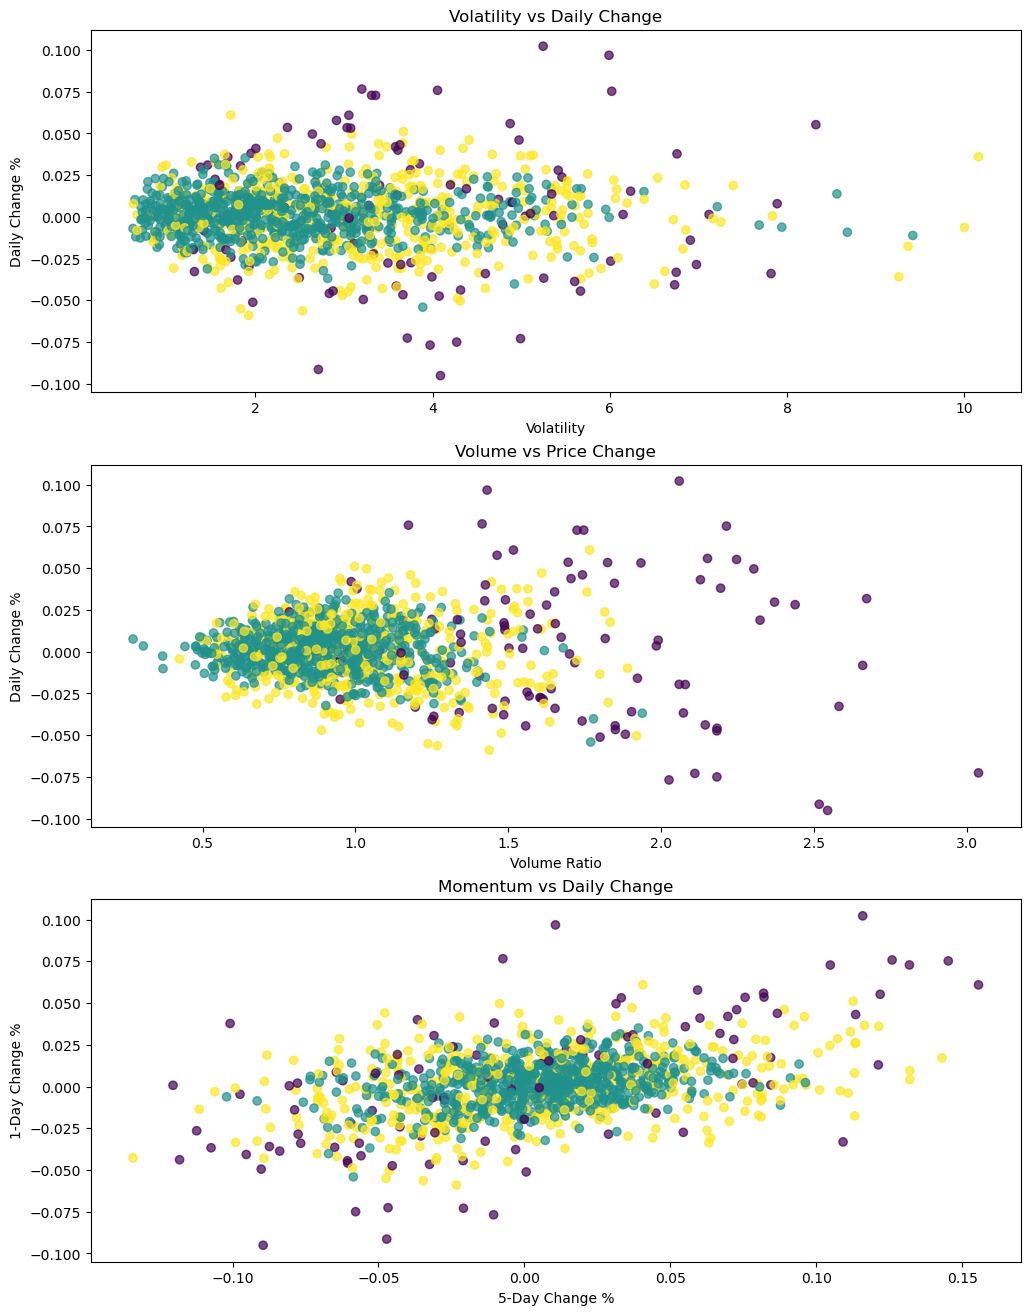

In [316]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.pipeline import FunctionTransformer, Pipeline
from sklearn.preprocessing import MinMaxScaler

# Use only numerical features for clustering
data = create_features(data)
clustering_features = ['Open', 'Close', 'High', 'Low', 'Volume', 'Difference', 'MA_5', 'MA_20', 
                  'Volatility', 'Change_1d', 'Change_5d', 'Volume_MA', 'Volume_Ratio', 'RSI_Signal']
scaler = MinMaxScaler((0,1))
pipeline = Pipeline([
    ('get_features', FunctionTransformer(lambda x: x[clustering_features])),
    ('dataframe', FunctionTransformer(lambda x: pd.DataFrame(x, columns=clustering_features)))
])

X = pipeline.fit_transform(data)

# Train a k-means model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

data["Cluster"] = kmeans.labels_

plt.figure(figsize=(12, 16))

# Plot 1: Volatility vs Daily Change
plt.subplot(3, 1, 1)
plt.scatter(X["Volatility"], X["Change_1d"], c=data["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("Volatility")
plt.ylabel("Daily Change %")
plt.title("Volatility vs Daily Change")

# Plot 2: Volume vs Price Change
plt.subplot(3, 1, 2)
plt.scatter(X["Volume_Ratio"], X["Change_1d"], c=data["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("Volume Ratio")
plt.ylabel("Daily Change %")
plt.title("Volume vs Price Change")

# Plot 3: 5-day momentum vs 1-day change
plt.subplot(3, 1, 3)
plt.scatter(X["Change_5d"], X["Change_1d"], c=data["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("5-Day Change %")
plt.ylabel("1-Day Change %")
plt.title("Momentum vs Daily Change")

plt.show()



# 4. Reflection and Discussion
- How does the choice of supervised or unsupervised learning depend on the dataset and problem?
- What challenges did you anticipate when applying each modeling technique?

## Reflection

Deciding between supervised and unsupervised learning depends on the problem you are trying to solve and the dataset you have. Unsupervised learning is useful for discovering hidden patterns, groupings, or structure in data that might not be immediately obvious. Supervised learning, on the other hand, is helpful when you want to predict values based on existing data, since it learns from known input-output pairs. If you already have labeled input and output features, you can use supervised learning to predict future outcomes based on new inputs.

## Challenges

I knew that given my limited dataset that using a classification model to predict stock prices higher or lower was not going to be very accurate, since the stocks activity in isolation is only a piece of what influences the price. I also ran into an issue when I was doing the regression problem where I figured out that I needed more features to try to increase the accuracy of my model. I could go back and apply the updated features to my classification model, but I don't see that model becoming very accurate. 
Another issue I faced that was unexpected, was the examples showing use the train_test_split function, so I started out using this. Later I realized that this function randomizes your observations, which is not what I want in the case of sequential daily stock price observations. Because of this I need to change the method for finding the X and Y test/train datasets.